In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags
from scipy.sparse.linalg import spsolve
from scipy.sparse.linalg import eigsh
from scipy.sparse import identity as sid
from matplotlib.pyplot import subplots, show
%matplotlib inline

# DUE 12/18/19, by 5:00 PM

**Problem 1**: (20pts) In quantum mechanics, it is really common to see boundary value problems of the form 

$$
-\epsilon\frac{d^{2}y}{dx^2} + \cos(\pi x)y = Ey, ~ y(-1) = y(1).
$$

where $0\leq \epsilon \ll 1$, i.e. we let $\epsilon$ be a small positive parameter.  $E\geq 0$ is the _energy_ of a particle trapped in an oscillating potential well $V(x) = \cos(\pi x)$, which is formed in crystal lattices of metals.  We likewise use _periodic-boundary conditions_ by setting 

$$
y(-1) = y(1).
$$

We desribe the probability of a particle being in the interval $[-1,a]$, $a<1$ via the formula

$$
P(-1\leq x \leq a) = \int_{-1}^{a} \tilde{y}(x), ~ \tilde{y}(x) = \frac{y^{2}(x)}{\int_{-1}^{1}y^{2}(x)dx}
$$

1a) Using second-order centered-difference approximations and spdiags, write code which discretizes the operator $-\epsilon\frac{d^{2}y}{dx^2} + \cos(\pi x)y\approx A{\bf y}$, where ${\bf y}=\left(y_{1} ~y_{2}\cdots y_{N-1}\right)^{T}$, $y_{j}=y(x_{j})$.  Note, the periodic boundary conditions are implemented as 

$$
y_{0} = y_{N-1}, ~ y_{N} = y_{1}.
$$

1b) You have now formed a discrete eigenvalue problem $A{\bf y} = E{\bf y}$.  Using the code below find the first 10 eigenvalues of the discretized equations.  For $\epsilon=1,.1,.01$ and $.001$, describe via a well designed plot how the first ten energy levels change as you decrease $\epsilon$.  

1c) For $\epsilon=.01$, compare the associated probability distributions $\tilde{y}(x)$ for the first three energy levels.  How do the likelihoods of where a particle would be found change with changing energy?   

**problem 1(a)- answer**
For the points $\left\{x_{j}\right\}_{j=1}^{N-1}$, we have the centered-difference approximations to the second derivative so that 

$$
y''(x_{j}) \approx \frac{1}{(\delta x)^{2}}\left(y_{j-1} - 2y_{j} + y_{j+1}\right), ~ j=1,\cdots,N-1.
$$

with the boundary conditions

$$
y_{0} = y_{N-1}, ~ y_{N} = y_{1}.
$$

$$
\frac{-\epsilon}{(\delta x)^{2}}\begin{pmatrix} -2 & 1 & &  &1\\
1 & -2 & 1 &\\
 & & \ddots & & \\
 & & 1 & -2 & 1\\
 1& & & 1 & -2
\end{pmatrix} \begin{pmatrix} y_{1} \\ y_{2} \\ \vdots \\ y_{N-2} \\ y_{N-1}  \end{pmatrix} + \begin{pmatrix} \cos(\pi x_{1}) & 0 & &\\
0 & \cos(\pi x_{2}) & 0 &\\
 & & \ddots & & \\
 & & 0 & \cos(\pi x_{N-2}) & 0\\
 & & & 0 & \cos (\pi x_{N-1}) 
\end{pmatrix}\begin{pmatrix} y_{1} \\ y_{2} \\ \vdots \\ y_{N-2} \\ y_{N-1}\end{pmatrix}
= A\cdot \begin{pmatrix} y_{1} \\ y_{2} \\ \vdots \\ y_{N-2} \\ y_{N-1}\end{pmatrix}
$$

In [35]:
def eval_find(Nvls,xvals,epvl):
    Nint = int(Nvls)
    dx = xvals[1]-xvals[0]
    idx2 = 1/dx**2
    
    diag = 2.*epvl*idx2*np.ones([Nint-1]) +np.cos(np.pi*xvals[1:Nvls])
    odiag = -1*epvl*idx2*np.ones([Nint-1]) 
    oudiag = -1*epvl*idx2*np.ones([Nint-1]) 
    oldiag = -1*epvl*idx2*np.ones([Nint-1]) 
    data = np.array([diag, odiag, odiag, oudiag, oldiag])
    dvals = np.array([0,-1,1, Nint-2, 2-Nint])  
    Amat = spdiags(data, dvals, Nint-1, Nint-1)
    eigenvalues, eigenvectors = eigsh(Amat,10,which='SM',mode='buckling')
    
    return [eigenvalues, eigenvectors]



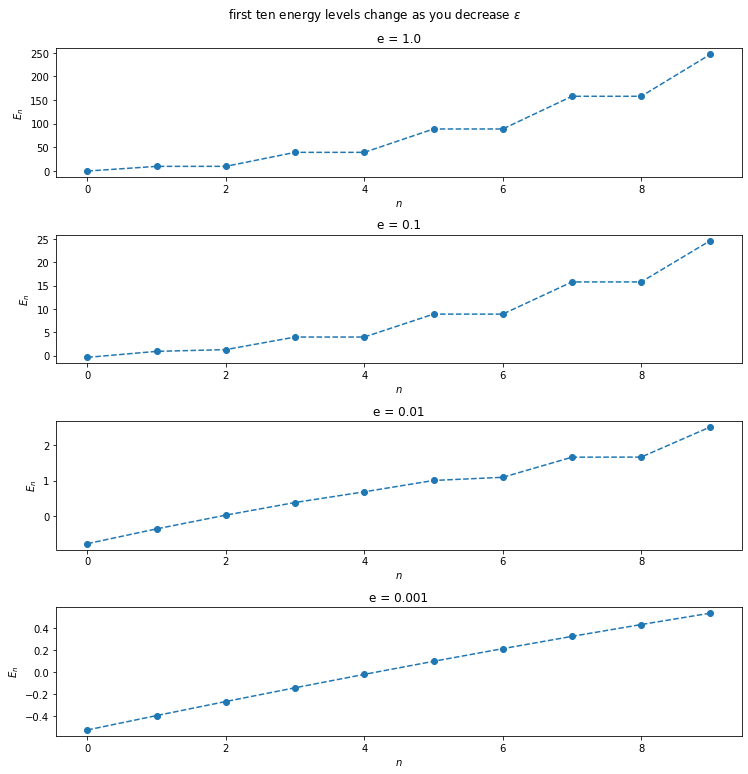

In [30]:
Nvls = 2000
xvals = np.linspace(-1.,1.,Nvls+1)
epvl = [1., 0.1, 0.01, 0.001]
fig, axs = plt.subplots(4)
idx = 0
for j in epvl:
    tprofile = eval_find(Nvls,xvals,j)
    axs[idx].plot(np.arange(tprofile.size),tprofile[:], marker='o', linestyle='dashed')
    axs[idx].set_title('e = %s' %j)
    axs[idx].set( xlabel = "$n$", ylabel = "$E_{n}$")
    idx+=1

fig.suptitle('first ten energy levels change as you decrease $\epsilon$',  y=1.02)
fig.set_size_inches(10.5, 10.5, forward=True)
plt.tight_layout()

**Problem 1(b)-answer**
In the plot above you can see that as we decrease epsilon value we get a smaller energy level. Hence, epsilon and the energy level are proportional. In addition, notice as we decrease epsilon we get an energy plot that has similar characterisics to a linear line (notice the last plot). 

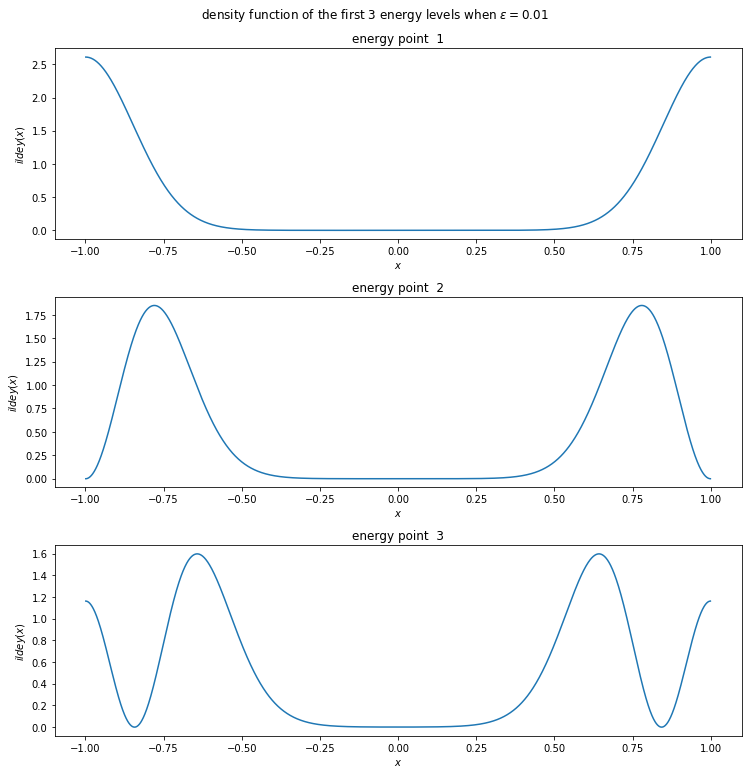

In [37]:
Nvls = 2000
xvals = np.linspace(-1.,1.,Nvls+1)
epvl = 0.01
info = eval_find(Nvls,xvals,epvl)
evals = info[0]
evecs = info[1]
fig, axs = plt.subplots(3)
idx = 0
for idx in range(0,3):
    bottom = np.trapz(evecs[:,idx]**2, xvals[1:Nvls])
    axs[idx].plot(xvals[1:Nvls],(evecs[:,idx]**2)/bottom)
    axs[idx].set_title('energy point  %s' % (idx+1))
    axs[idx].set( xlabel = '$x$', ylabel = '$ \tilde{y}(x) $')
    idx+=1

fig.suptitle('density function of the first 3 energy levels when $\epsilon = 0.01$',  y=1.02)
fig.set_size_inches(10.5, 10.5, forward=True)
plt.tight_layout()

**problem 1(c)- answer**
The likelihood of a particle be found changes with changing energy. This is because the tidle y (density function) changes with different energy values. As you can see the area under the graphs aboves will differ hence the propobility will change as well. This means that it it most probable to be found on the edges of the space. It is unlikely for a particle to be found the center of our space x. 

**Comments**: Computation of distributions is missing endpoint effects.  -1

**Problem 2**: (20 pts) A more realistic way to describe the dynamics of temperature in a narrow corridor is via the _heat equation_, which is a partial differential equation describing how the temperature $T(x,t)$ changes in both space and time.  It is given by

$$
\frac{\partial T}{\partial t} = k \frac{\partial^{2}T}{\partial x^{2}}, ~ a\leq x \leq b
$$

where $k>0$ is the _thermal diffusion_ coefficient, and where we have the _oscillating_ boundary conditions 

$$
\left.\frac{\partial T(x,t)}{\partial x}\right|_{x=a} = \frac{1-\cos(t)}{2}
$$

and

$$
\left.\frac{\partial T(x,t)}{\partial x}\right|_{x=b} = -\sin(t), 
$$

representing two heat flux sources at either end of the domain, such as might arise from the motion of the Sun throughout the day, allowing for cooling on one side and heating on the other, with their roles switching as the Sun moves from East to West.  We likewise have the initial temperature distribution

$$
T(x,0) = u(x).
$$

To numerically solve this, letting $x_{j}= a + j\delta x$, $\delta x = (b-a)/N$

2a) Letting $T_{j}(t)=T(x_{j},t)$, show that the insulating boundary conditions are approximated by the finite-difference approximations:
$$
T_{0}(t) = \frac{2}{3}\left(2T_{1}(t)-\frac{1}{2}T_{2}(t)\right)-\frac{2\delta x}{3} \frac{(1-\cos(t))}{2}, ~ T_{N}(t) = \frac{2}{3}\left(2T_{N-1} - \frac{1}{2}T_{N-2}(t)\right)-\frac{2\delta x}{3} \sin(t).  
$$
(Note, see Homework Ten).  
2b) Using second-order centered-differencing approximations for the $\partial^{2}T/\partial{x^{2}}$ term, show that by discretizing in space, you get the following initial value problem

$$
\frac{d{\bf T}}{dt} = kA{\bf T}, ~ {\bf T}(t) = \begin{pmatrix} T_{1}(t) \\ T_{2}(t) \\ \cdots \\ T_{N-1}(t)\end{pmatrix}, ~ {\bf T}(0) = \begin{pmatrix} u(x_{1}) \\ u(x_{2}) \\ \cdots \\ u(x_{N-1})\end{pmatrix}
$$

where $A$ is some $(N-1)\times (N-1)$ sparse matrix.  What is $A$?  Is $A$ still symmetric?   

2c) Using the Trapezoid Method, we can discretize in time so that if we use time step $\delta t$, we get 

$$
\left(I - \frac{\delta t k}{2} A\right){\bf T}_{m+1} = \left(I + \frac{\delta t k}{2} A\right){\bf T}_{m} + \frac{\delta t k}{2}\left({\bf f}_{m+1} + {\bf f}_{m}\right),
$$

where 

$$
{\bf T}_{m} = {\bf T}(t_{m}) = \begin{pmatrix} T(x_{1},t_{m}) \\ T(x_{2},t_{m}) \\ \cdots \\ T(x_{N-1},t_{m})\end{pmatrix}
$$

and

$$
{\bf f}_{m} = \frac{2}{3\delta x}\begin{pmatrix} -(1-\cos(t_{m}))/2 \\ 0 \\ \vdots \\ 0 \\ -\sin(t_{m}) \end{pmatrix}
$$

Using the code snippet below implement the above scheme to solve the heat equation.  Using the initial heat distribution

$$
u(x) = e^{-(x-5)^{2}}, ~ 0\leq x \leq 10,
$$

generate several plots which show for $0\leq t \leq 10$ how changing the thermal diffusion paramter $k$ from $k=1,10,100$ changes the behavior of the temperature.  Explain your results and comment on any interesting phenomena. 

**Problem - 2(a) answer** 
we know that 
forward difference approximation $\frac{\partial T(x_{0})}{\partial x} \approx \frac{1}{\delta x}(\frac{-3}{2}T_{0}(t)+2T_{1}(t) -\frac{1}{2}T_{2}(t)) = \frac{1-\cos(t)}{2}$ hence, 
$$
T_{0}(t) = \frac{2}{3}\left(2T_{1}(t)-\frac{1}{2}T_{2}(t)\right)-\frac{2\delta x}{3} \frac{(1-\cos(t))}{2}
$$
and backwards difference approximation: $\frac{\partial T(x_{N-2})}{\partial x} \approx \frac{1}{\delta x}(-2T(x_{N-1}) + \frac{3}{2}T(x_{N})+\frac{1}{2}T(x_{N-2})) =-\sin(t)$ hence, $T_{N}= T_{N}(t) = \frac{2}{3}\left(2T_{N-1} - \frac{1}{2}T_{N-2}(t)\right)-\frac{2\delta x}{3} \sin(t)$.

**Problem - 2(b) answer** 
$$
\frac{d{\bf T}}{dt} = kA{\bf T}, ~ {\bf T}(t) = \begin{pmatrix} T_{1}(t) \\ T_{2}(t) \\ \cdots \\ T_{N-1}(t)\end{pmatrix}, ~ {\bf T}(0) = \begin{pmatrix} u(x_{1}) \\ u(x_{2}) \\ \cdots \\ u(x_{N-1})\end{pmatrix}
$$

where $A$ is some $(N-1)\times (N-1)$ sparse matrix. 

$$
\frac{k}{(\delta x)^{2}}\begin{pmatrix} \frac{-2}{3} & \frac{2}{3} & &\\
1 & -2 & 1 &\\
 & & \ddots & & \\
 & & 1 & -2 & 1\\
 & & & \frac{2}{3}& \frac{-2}{3}
\end{pmatrix} \begin{pmatrix} T_{1} \\ T_{2} \\ \vdots \\ T_{N-2} \\ T_{N-1}\end{pmatrix} = \begin{pmatrix} \frac{d{\bf T_{1}}}{dt} +\frac{\delta x (1- \cos(t))}{3} \\  \\ \vdots \\ \frac{d{\bf T_{N-2}}}{dt} \\ \frac{d{\bf T_{N-1}}}{dt} + \frac{2 \delta x \sin(t)}{3} \end{pmatrix}
$$

In [3]:
def heat_eq_solver(k,u0,Nvls,dx,dt,t0,tf):    
    nsteps = int(np.round((tf-t0)/dt))
    Tsol = np.zeros((Nvls-1,nsteps+1)) # build a matrix to store our solution 
    Tsol[:,0] = u0
    idx2 = 1./(dx**2.)
    diag = -2.*np.ones(Nvls-1)
    udiag = np.ones(Nvls-1)
    ldiag = np.ones(Nvls-1)
    diag[0] = -2/3
    diag[Nvls-2] = -2/3
    udiag[1] = 2/3
    ldiag[Nvls-3] =2/3
    data = np.array([diag,ldiag,udiag])
    dvals = np.array([0,-1,1])
    Amat = idx2*spdiags(data, dvals, Nvls-1, Nvls-1)
    Lp = sid(Nvls-1) + dt*k*Amat/2.
    Lm = sid(Nvls-1) - dt*k*Amat/2.
    for mm in range(0,nsteps):
        tm = t0+ mm*dt
        fm, fm1 = np.zeros(nsteps-1), np.zeros(nsteps-1)
        fm[0] = -((1./(3.*dx))*(1.-np.cos(tm)))
        fm[nsteps-2] = -(2./(3.*dx))*np.sin(tm)
        fm1[0] = -((2./(3.*dx))*(1.-np.cos(tm+dt)))/2.
        fm1[nsteps-2] = -(2./(3.*dx))*np.sin(tm+dt)
        Tsol[:,mm+1] = spsolve(Lm,Lp*Tsol[:,mm]+((dt*k)*(fm1+fm)/(2)))
    return Tsol

**Comments**:  How did this even work?  `fm` is `Nvls-1` long.  This worked because of a happy accident.  Also a bit inefficient in the coding.  -1

In [43]:
Nvls = int(1e2)
xvals = np.linspace(0.,10.,Nvls+1)
xvalsc = xvals[1:Nvls]
dx = 10./Nvls
dtval = [1e-1, 1e-2, 1e-3]
kval = [1., 10, 100.]
tfval = [10., 1., 0.1]
tvals = [np.linspace(0,10,6), np.linspace(0,1,6), np.linspace(0,0.1,6)]
t0 = 0.
u0 = np.exp(-(xvals[1:Nvls]-5.)**2.)

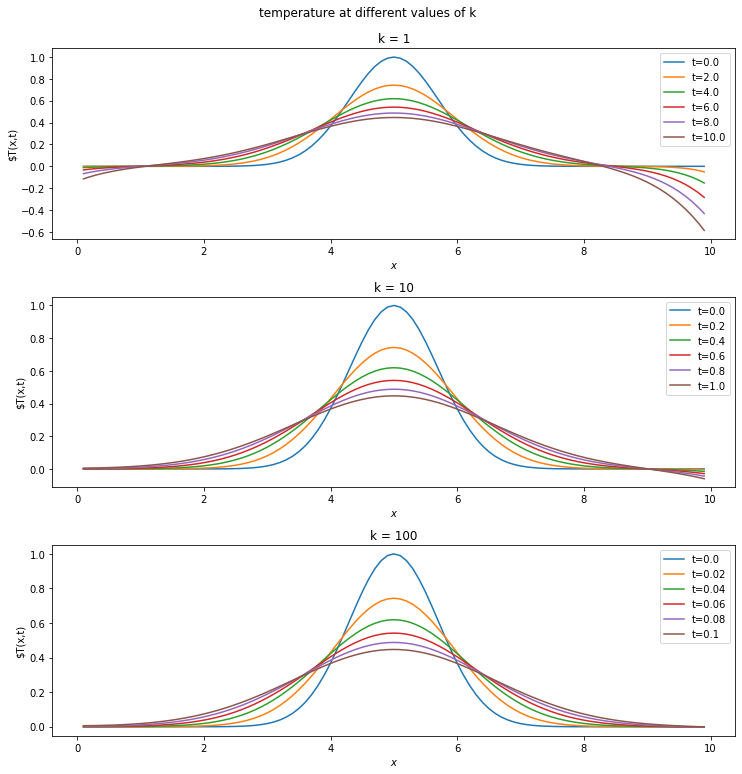

In [78]:
fig, axs = plt.subplots(3)
for idx in range(0,3):
    Tsol = heat_eq_solver(kval[idx],u0,Nvls, dx, dtval[idx], t0, tfval[idx])
    for tt in range(0,11,2):
        axs[idx].plot(xvalsc, Tsol[:,tt], label='t=%s' % np.round((tvals[idx][int(tt/2.)]),4))
        axs[idx].set_title("k = %s" %int(kval[idx]))
        axs[idx].set(xlabel = '$x$', ylabel = '$T(x,t)')
        axs[idx].legend()
        
fig.suptitle('temperature at different values of k',  y=1.02)
fig.set_size_inches(10.5, 10.5, forward = True)
plt.tight_layout()
plt.show()

**Problem 2(c)- answer**
From the results above you can see that as we increase K our temp will go back to natural state fast. Meaning, for K =1 the temp function will become a constant close to zero when t = 10, whereas when k =10 then the temp function will be close to zero when t = 1, and when k =100 then the temp function will be close to zero when t = 0.1. Therefore, K and the convergence of the temp equation are proportional, when you increase k by a factor of 10 you need to decrease your time step size by a factor of 10. 

**Comments**:  Your plots are confusing the actual time steps with the column numbers of the solution matrix.  Thus you are not looking out on anywhere near as long of a time as you have the graphs labeled.  -1

**Problem 3** (10pts): A method for solving the matrix problem 

$$
A{\bf x} = {\bf b}
$$

where $A$ is an $n\times n$ matrix, and ${\bf x},{\bf b} \in \mathbb{R}^{n}$, goes as follows.  

* Write $A = D + R$, where $D$ is the diagonal of $A$, and $R= A-D$ is everything not on the diagonal of $A$.
* Given an initial choice of ${\bf x}_{0}$, define the iterative scheme 
$$
{\bf x}_{k+1} = D^{-1}\left({\bf b} - R{\bf x}_{k} \right), ~ k\geq 0.  
$$
* For a user defined tolerance $tol$, stop when 
$$
\left|\left|{\bf x}_{k+1} - {\bf x}_{k} \right|\right|_{2} < tol.  
$$

Given this method then, 

* Complete the code skeleton below.  
* Using the matrices generated by Problem 1, test your code on several different sized matrices, say where $n=10, ~100, ~200$.  Likewise choose ${\bf b}$ to be random vectors of size $10$, $100$, and $200$.  For the $tol$ values of $tol=10^{-4}$ and $tol=10^{-8}$, compare the results of your method to those you get using `spsolve`.  Do you see any variation in the accuracy of your results due to the change in size of the dimension of the problem?    
* For $n=200$, numerically determine the rate of convergence of this method, i.e. find $\alpha$ where
$$
\lim_{k\rightarrow \infty}\frac{\left|\left|{\bf x}_{k+1}-{\bf x}_{\ast}\right|\right|_{2}}{\left|\left|{\bf x}_{k}-{\bf x}_{\ast}\right|\right|^{\alpha}_{2}} = \lambda
$$
and where
$$
A{\bf x}_{\ast} \approx {\bf b},
$$
in other words ${\bf x}_{\ast}$ is the exact solution, or your best approximation to it.  

In [495]:
def iter_solver(A,b,x0,tol):
    Da = np.diag(A)
    Rmat = A - np.diag(Da)
    x1 = (b - np.dot(Rmat,x0))/Da 
    num_of_iter = 1                        
    while np.linalg.norm(x1-x0,2) >= tol:
        x0 = x1
        x1 = (b - np.dot(Rmat,x1))/Da
        num_of_iter += 1
    return x1

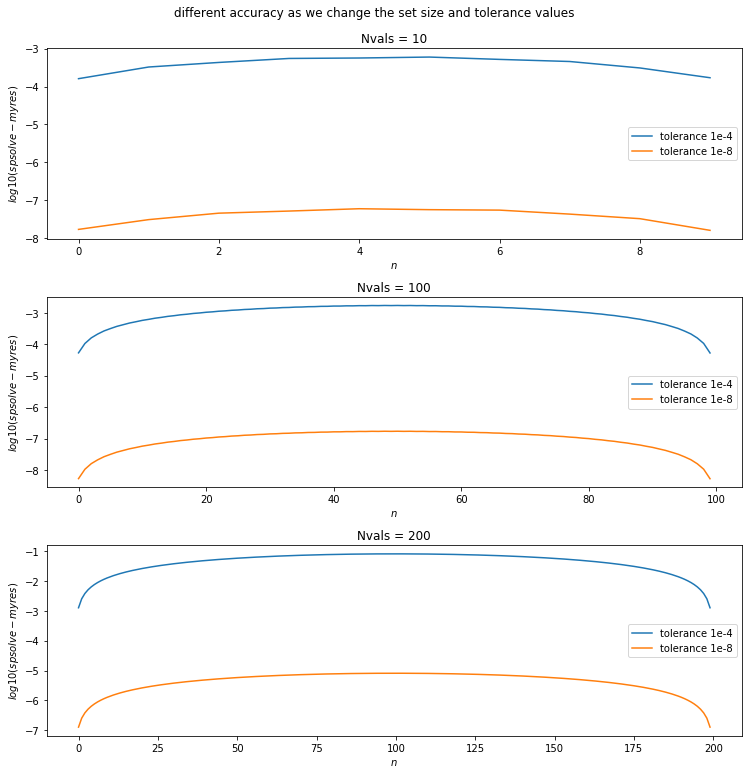

In [496]:
fig, axs = plt.subplots(3)
Nvals = [10, 100, 200]
for idx in range(0,3):
    xvals = np.linspace(0, Nvals[idx]-1, int(Nvals[idx]))
    diag = 2.*np.ones([Nvals[idx]])
    odiag = -1*np.ones([Nvals[idx]]) 
    data = np.array([diag, odiag, odiag])
    dvals = np.array([0,-1,1])  
    Amat = spdiags(data, dvals, Nvals[idx], Nvals[idx]).toarray()
    btn = np.random.randn(Nvals[idx])
    myres4 = iter_solver(Amat, btn, np.ones(Nvals[idx]), 1e-4)
    myres8 = iter_solver(Amat, btn, np.ones(Nvals[idx]), 1e-8)
    spres = spsolve(Amat, btn)
    axs[idx].plot(xvals, np.ma.log10(np.abs(myres4 - spres)), label = "tolerance 1e-4")
    axs[idx].plot(xvals, np.ma.log10(np.abs(myres8 - spres)), label = "tolerance 1e-8")
    axs[idx].set_title("Nvals = %s" % int(Nvals[idx]))
    axs[idx].set(xlabel = '$n$', ylabel = '$log10(spsolve - myres)$')
    axs[idx].legend()

fig.suptitle('different accuracy as we change the set size and tolerance values',  y=1.02)
fig.set_size_inches(10.5, 10.5, forward = True)
plt.tight_layout()
plt.show()

In the graphs above you can examine that as we increase the step size of your matrix (A) and random vector generator (b) your result is less accurate. This is because the bigger the step size the more computation needed. This is becuase our computer will need to solve more equations with more variables. 
As expected, when we decrease the tolerance value the more accurate our result will be. In fact, when the tolerance is 1e-8 it is 4 digits more accuarte than when the tolerance is 1e-4. 

In [64]:
btn = np.random.randn(Nvals)
len(btn)

200

In [176]:
def iter_solverpart2(A,b,x0,tol):
    Da = np.diag(A)
    Rmat = A - np.diag(Da)
    x1 = (b - np.dot(Rmat,x0))/Da 
    num_of_iter = 1           
    xkvec = np.array([x0])
    xkvec1 = np.array([x1])
    while np.linalg.norm(x1-x0,2) >= tol:
        x0 = x1
        x1 = (b - np.dot(Rmat,x1))/Da
        num_of_iter += 1
        if num_of_iter >= 71500:
            xkvec = np.vstack((xkvec, [x0]))
            xkvec1 = np.vstack((xkvec1, [x1]))
    return [xkvec, xkvec1]

In [177]:
Nvals = 200
xvals = np.linspace(0, Nvals-1, int(Nvals))
diag = 2.*np.ones([Nvals])
odiag = -1*np.ones([Nvals]) 
data = np.array([diag, odiag, odiag])
dvals = np.array([0,-1,1])  
Amat = spdiags(data, dvals, Nvals, Nvals).toarray()
myres4 = iter_solverpart2(Amat, btn, np.ones(Nvals), 1e-4)
xstar = spsolve(Amat, btn)


In [183]:
xk = myres4[0]
xk1 = myres4[1]
sub = xk- xstar
sub1 = xk1 - xstar
len(sub)

120

In [184]:
xvals = np.array([])
yvals = np.array([])
for idx in range(1,119):
    xvals = np.append(xvals, np.log10(np.abs(np.linalg.norm(sub[idx],2))))
    yvals = np.append(yvals, np.log10(np.abs(np.linalg.norm(sub1[idx],2))))

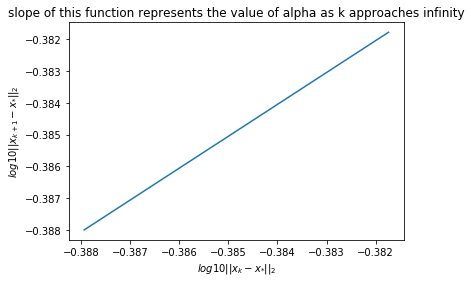

maximum slope, alpha =  0.9998632732777688
minimum slope value = 0.9998610504989535
average slope value = 0.9998621678114709


In [185]:
fig, ax = subplots()
ax.plot(xvals, yvals)
ax.set_xlabel("$log10 ||{x}_{k} - {x}_{*} ||_{2}$")
ax.set_ylabel("$log10 ||{x}_{k+1} - {x}_{*} ||_{2}$")
ax.set_title("slope of this function represents the value of alpha as k approaches infinity")
show()
alpha = xvals/yvals
print("maximum slope, alpha =  %s" %max(alpha))
print("minimum slope value = %s" %min(alpha))
print("average slope value = %s" %(sum(alpha) / len(alpha)))


From the results above, you can see that alpha is equal to 1. Meaning , there is a linear convergence rate. If alpha was 2 then it would be quadratic and would converge faster. 

**Total**: 47/50 ( Well done :) )